# Import Libraries


### Pandas 
### Numpy 
### Matplotlib 
### Seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the File 

In [3]:
df = pd.read_csv("stock_market_multi_feature.csv")
df.head(5)

,Day,Volume,Moving_Avg_10,Moving_Avg_50,Sentiment_Score,Stock_Price
0,1,7423388,54.191537,51.861791,0.292803,99.093777
1,2,7550634,63.809729,53.868516,0.090726,67.980516
2,3,5304572,75.249245,55.756089,-0.897587,-2.866395
3,4,3234489,82.662699,57.291693,0.491006,187.315602
4,5,8204212,90.749827,60.759522,0.010664,70.277903


### Check the Data Formart ( Linear or NON-Linear) Dataset is NON Linear

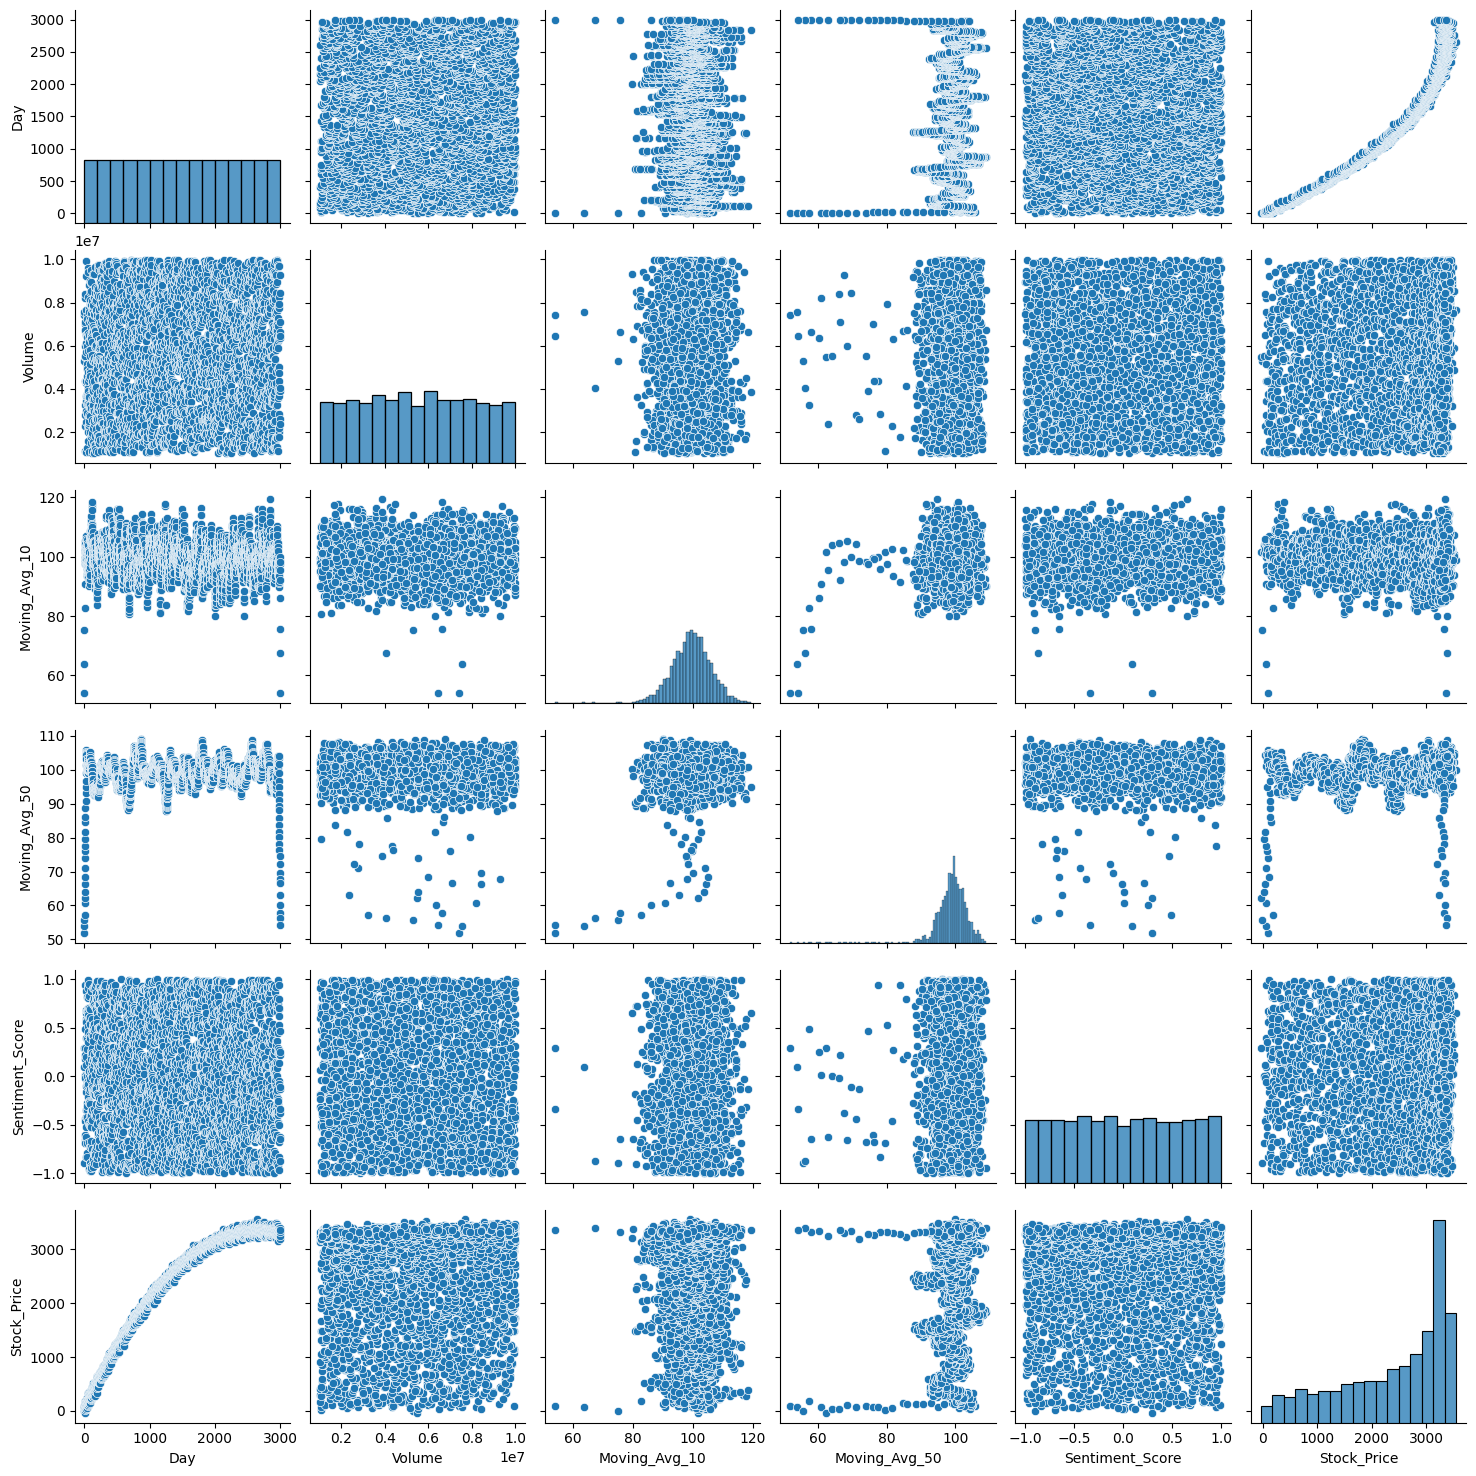

In [6]:
sns.pairplot(data=df)
plt.show()

### Check Null Value

In [7]:
df.isnull().sum()

Day                0
Volume             0
Moving_Avg_10      0
Moving_Avg_50      0
Sentiment_Score    0
Stock_Price        0
dtype: int64

### Check Co-relation in variable

In [8]:
df.describe

<bound method NDFrame.describe of        Day   Volume  Moving_Avg_10  Moving_Avg_50  Sentiment_Score  \
0        1  7423388      54.191537      51.861791         0.292803   
1        2  7550634      63.809729      53.868516         0.090726   
2        3  5304572      75.249245      55.756089        -0.897587   
3        4  3234489      82.662699      57.291693         0.491006   
4        5  8204212      90.749827      60.759522         0.010664   
...    ...      ...            ...            ...              ...   
2995  2996  2349590      95.341740      63.071992        -0.629670   
2996  2997  6366645      86.079619      60.199063         0.253833   
2997  2998  6629905      75.652001      57.837725        -0.652402   
2998  2999  4045529      67.487954      56.214327        -0.872348   
2999  3000  6440107      54.025614      54.271123        -0.339285   

      Stock_Price  
0       99.093777  
1       67.980516  
2       -2.866395  
3      187.315602  
4       70.277903  
...  

### Check Data Types of every Variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              3000 non-null   int64  
 1   Volume           3000 non-null   int64  
 2   Moving_Avg_10    3000 non-null   float64
 3   Moving_Avg_50    3000 non-null   float64
 4   Sentiment_Score  3000 non-null   float64
 5   Stock_Price      3000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 140.8 KB


### Distribute the Data in X and Y variable ( Dependent or Independent Variable)

In [11]:
X =df.iloc[:,:1]
Y=df[["Stock_Price"]]

### Apply the Polynomial Feature

In [12]:
from sklearn.preprocessing import PolynomialFeatures

### Fit The Polynomial Feature

In [17]:
Ploy = PolynomialFeatures(degree=3)
X_ploy=Ploy.fit_transform(X)

### Select the Model Selection for Spliting the Data

In [19]:
from sklearn.model_selection import train_test_split

### Split Data into Train and Test

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_ploy,Y , test_size=0.2,random_state=42)

### Select the linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

### Fit the Mode / Apply the model

In [23]:
lr =LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Check the Score (accuracy) of model | For Check  the overfitting of Model ,But our model in not overfitting

In [26]:
lr.score(x_test,y_test)*100 , lr.score(x_train,y_train)*100

(99.70749475652337, 99.66969273309867)

### Now Predict the value 

In [30]:
df["Prediction"] =lr.predict(X_ploy)
df.head(5)

,Day,Volume,Moving_Avg_10,Moving_Avg_50,Sentiment_Score,Stock_Price,Prediction
0,1,7423388,54.191537,51.861791,0.292803,99.093777,51.725095
1,2,7550634,63.809729,53.868516,0.090726,67.980516,54.237438
2,3,5304572,75.249245,55.756089,-0.897587,-2.866395,56.748766
3,4,3234489,82.662699,57.291693,0.491006,187.315602,59.259080
4,5,8204212,90.749827,60.759522,0.010664,70.277903,61.768378


### Import Some Metrics For check the accurate working of our model or performance 

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Check the metrics 

In [37]:
mae = mean_absolute_error(df["Stock_Price"], df["Prediction"]) 
mse = mean_squared_error(df["Stock_Price"], df["Prediction"])
rmse = np.sqrt(mse)
r2 = r2_score(df["Stock_Price"], df["Prediction"])


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 44.71520498134873
Mean Squared Error (MSE): 3138.092942664196
Root Mean Squared Error (RMSE): 56.018683871224574
R² Score: 0.9967822910042706


### Prediction price vs Stock Price 

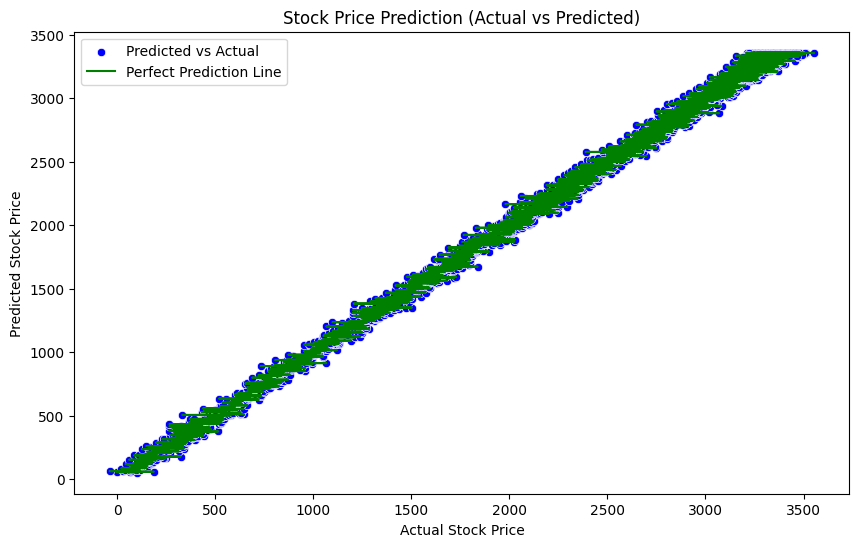

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Stock_Price", y="Prediction", data=df, color="blue", label="Predicted vs Actual")
plt.plot(df["Stock_Price"], df["Prediction"], color="green", label="Perfect Prediction Line") 
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Stock Price Prediction (Actual vs Predicted)")
plt.legend()
plt.show()


### Prediction According to Volume 

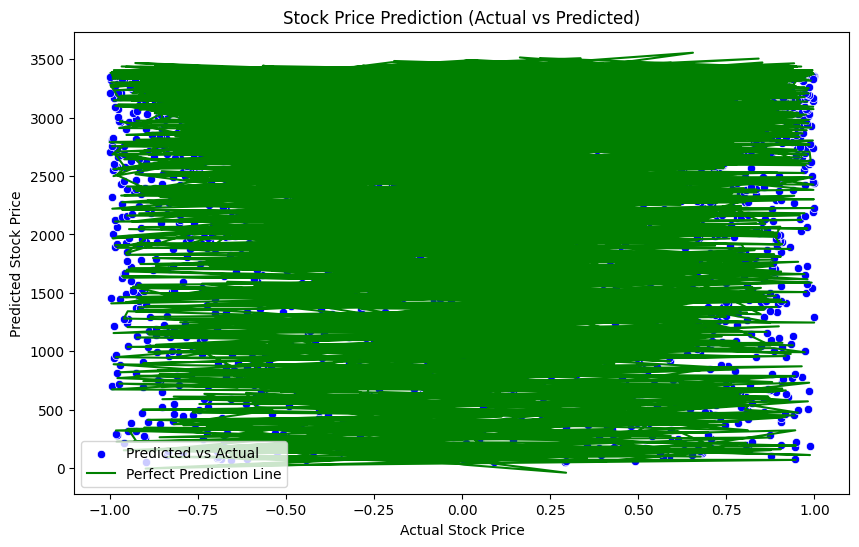

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sentiment_Score", y="Prediction", data=df, color="blue", label="Predicted vs Actual")
plt.plot(df["Sentiment_Score"], df["Stock_Price"], color="green", label="Perfect Prediction Line") 
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Stock Price Prediction (Actual vs Predicted)")
plt.legend()
plt.show()
